# Job-Shop Scheduling Beispiel

In [2]:
import json

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [4]:
from utils.plotter import plot_gantt_jobs
from utils.plotter import plot_gantt_machines

In [5]:
# Datei laden
with open("data/jobshop_instances_named.json", "r", encoding="utf-8") as f:
    jobshop_instances = json.load(f)


In [6]:
instance_ft10 = jobshop_instances["instance ft10"]

for job_name in sorted(instance_ft10, key=lambda x: int(x.split()[1])):
    ops = instance_ft10[job_name]
    op_str = '\t'.join(f"({m}, {d})" for m, d in ops)
    print(f"{job_name}:\t{op_str}")
    #print(op_str)

job 0:	(0, 29)	(1, 78)	(2, 9)	(3, 36)	(4, 49)	(5, 11)	(6, 62)	(7, 56)	(8, 44)	(9, 21)
job 1:	(0, 43)	(2, 90)	(4, 75)	(9, 11)	(3, 69)	(1, 28)	(6, 46)	(5, 46)	(7, 72)	(8, 30)
job 2:	(1, 91)	(0, 85)	(3, 39)	(2, 74)	(8, 90)	(5, 10)	(7, 12)	(6, 89)	(9, 45)	(4, 33)
job 3:	(1, 81)	(2, 95)	(0, 71)	(4, 99)	(6, 9)	(8, 52)	(7, 85)	(3, 98)	(9, 22)	(5, 43)
job 4:	(2, 14)	(0, 6)	(1, 22)	(5, 61)	(3, 26)	(4, 69)	(8, 21)	(7, 49)	(9, 72)	(6, 53)
job 5:	(2, 84)	(1, 2)	(5, 52)	(3, 95)	(8, 48)	(9, 72)	(0, 47)	(6, 65)	(4, 6)	(7, 25)
job 6:	(1, 46)	(0, 37)	(3, 61)	(2, 13)	(6, 32)	(5, 21)	(9, 32)	(8, 89)	(7, 30)	(4, 55)
job 7:	(2, 31)	(0, 86)	(1, 46)	(5, 74)	(4, 32)	(6, 88)	(8, 19)	(9, 48)	(7, 36)	(3, 79)
job 8:	(0, 76)	(1, 69)	(3, 76)	(5, 51)	(2, 85)	(9, 11)	(6, 40)	(7, 89)	(4, 26)	(8, 74)
job 9:	(1, 85)	(0, 13)	(2, 61)	(6, 7)	(8, 64)	(9, 76)	(5, 47)	(3, 52)	(4, 90)	(7, 45)


> (Maschine, Dauer) je Operation

In [8]:
# JSON → Matrix (list of lists)
job_order = sorted(instance_ft10, key=lambda x: int(x.split()[1]))  # "job 0", "job 1", ...
matrix = [instance_ft10[job_name] for job_name in job_order]

# Matrix printen
for job in matrix:
    #job = '\t'.join(f"({m}, {d})" for m, d in job)
    print(job)


[[0, 29], [1, 78], [2, 9], [3, 36], [4, 49], [5, 11], [6, 62], [7, 56], [8, 44], [9, 21]]
[[0, 43], [2, 90], [4, 75], [9, 11], [3, 69], [1, 28], [6, 46], [5, 46], [7, 72], [8, 30]]
[[1, 91], [0, 85], [3, 39], [2, 74], [8, 90], [5, 10], [7, 12], [6, 89], [9, 45], [4, 33]]
[[1, 81], [2, 95], [0, 71], [4, 99], [6, 9], [8, 52], [7, 85], [3, 98], [9, 22], [5, 43]]
[[2, 14], [0, 6], [1, 22], [5, 61], [3, 26], [4, 69], [8, 21], [7, 49], [9, 72], [6, 53]]
[[2, 84], [1, 2], [5, 52], [3, 95], [8, 48], [9, 72], [0, 47], [6, 65], [4, 6], [7, 25]]
[[1, 46], [0, 37], [3, 61], [2, 13], [6, 32], [5, 21], [9, 32], [8, 89], [7, 30], [4, 55]]
[[2, 31], [0, 86], [1, 46], [5, 74], [4, 32], [6, 88], [8, 19], [9, 48], [7, 36], [3, 79]]
[[0, 76], [1, 69], [3, 76], [5, 51], [2, 85], [9, 11], [6, 40], [7, 89], [4, 26], [8, 74]]
[[1, 85], [0, 13], [2, 61], [6, 7], [8, 64], [9, 76], [5, 47], [3, 52], [4, 90], [7, 45]]


## Heuristische Regeln (Dispatching Rules)
Einfach anzuwenden, lokal entscheidend, oft als Baseline verwendet.


### Sequenzielles Scheduling der Job-Reihenfolge nach
Jobs werden in der Reihenfolge ihrer Indizes eingeplant, ohne Optimierung.
- kein FCFS – First Come First Serve (Earliest-Start-First)


In [11]:
schedule_fcfs = []
machine_ready = {}
job_ready = [0] * len(matrix)

for job_id, operations in enumerate(matrix):
    for machine, duration in operations:
        start = max(job_ready[job_id], machine_ready.get(machine, 0))
        end = start + duration

        schedule_fcfs.append({
            'Job': f'Job {job_id}',
            'Machine': f'M{machine}',
            'Start': start,
            'Duration': duration,
            'End': end
        })

        job_ready[job_id] = end
        machine_ready[machine] = end

# In DataFrame
import pandas as pd
df_schedule_fcfs = pd.DataFrame(schedule_fcfs)
df_schedule_fcfs


,Job,Machine,Start,Duration,End
0,Job 0,M0,0,29,29
1,Job 0,M1,29,78,107
2,Job 0,M2,107,9,116
3,Job 0,M3,116,36,152
4,Job 0,M4,152,49,201
...,...,...,...,...,...
95,Job 9,M9,3084,76,3160
96,Job 9,M5,3160,47,3207
97,Job 9,M3,3207,52,3259
98,Job 9,M4,3259,90,3349


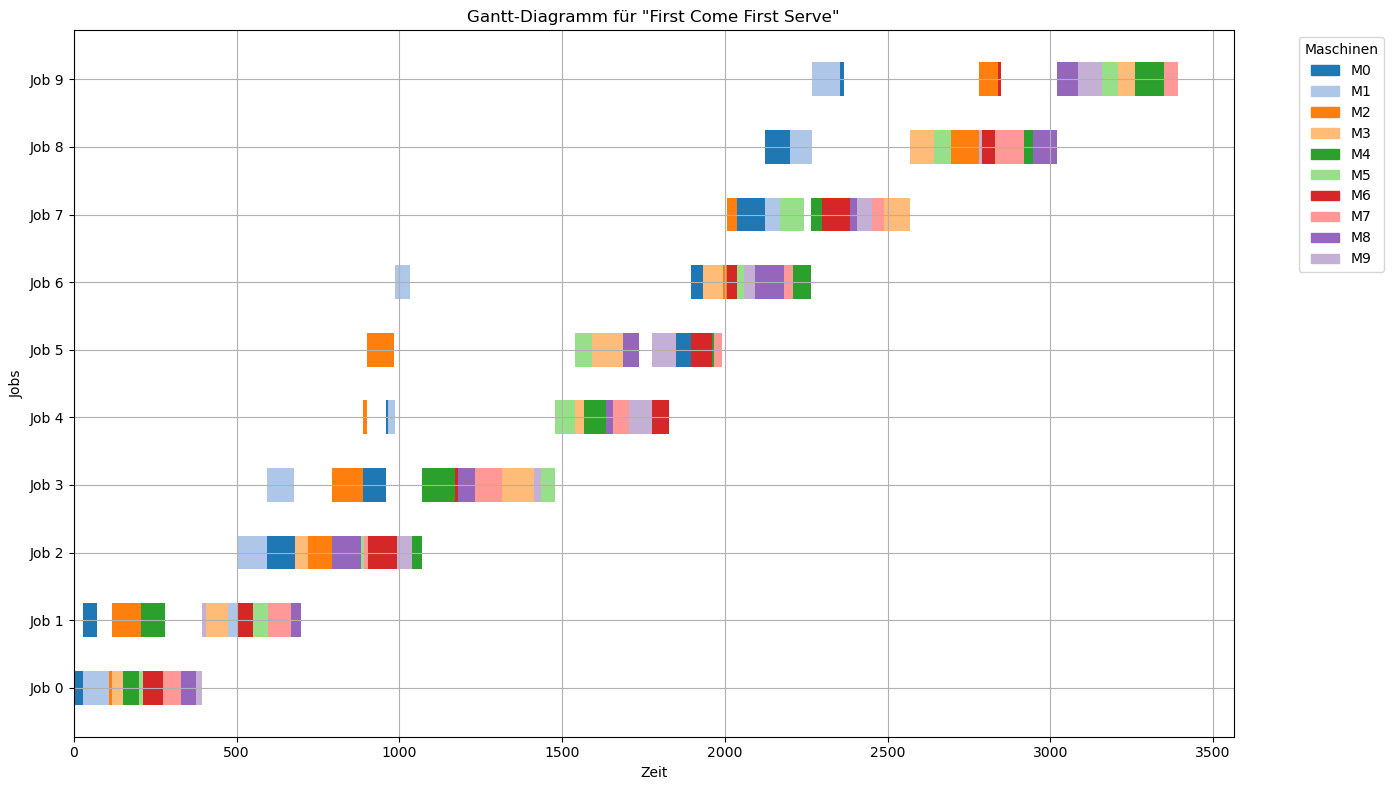

In [12]:
plot_gantt_jobs(df_schedule_fcfs, 'Gantt-Diagramm für "First Come First Serve"')

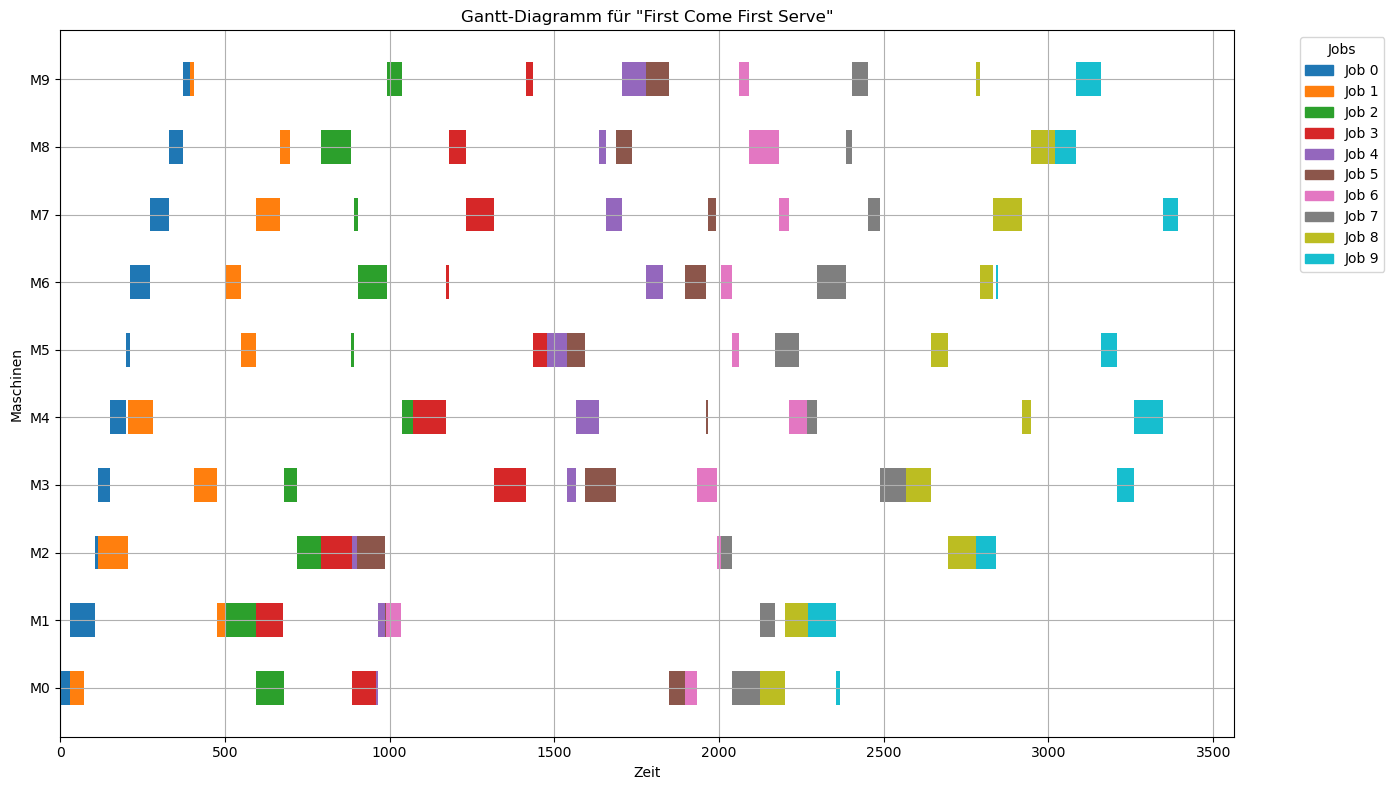

In [13]:
plot_gantt_machines(df_schedule_fcfs, 'Gantt-Diagramm für "First Come First Serve"')